In [3]:
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import norm
from matplotlib import cm
from scipy.stats import multivariate_normal

#Machinig learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [9]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_contoursExact(ax, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    #clf es un estimador de instancias usado para almacenar valores de modelos de entrenamiento
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #funcion ravel cambia el arreglo 2 dimensional a un arreglo plano continuo
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_learning_curve(estimator,title,X,y,axes=None,ylim=None,cv=None,n_jobs=None,train_sizes=np.linspace(0.1, 1.0, 5)):
  
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

def data( mu=[1,1], mu1=[-2,2], cov=[[1.0, 0.0], [0.0, 1.0]] , cov1= [[1.0, -0.5], [-0.5, 1.0]]   ):# Caso mas visible  
  rv = multivariate_normal(mu, cov)
  rv1 = multivariate_normal(mu1, cov1)
  return rv, rv1

def sample(N1= 1000, N2 = 100, r = 0.2):
  X_t = np.concatenate([rv.rvs(N1, random_state = r  ), rv1.rvs(N2,random_state = r)]) # Todos los datos en la misma distribución, 
  y   = np.concatenate([np.zeros(N1), np.ones(N2) ]  )
  return X_t, y

def graph_gaussian_contour(x, y, pos, rv,  rv2):
  fig = plt.figure(figsize = (12,6))
  ax = fig.add_subplot(1, 2, 1, projection='3d')
  surf1 = ax.plot_surface(x,y, rv.pdf(pos) + rv1.pdf(pos), cmap = cm.coolwarm,
                        linewidth = 0, antialiased = False)
  ax.set_xlabel("$X_1$")
  ax.set_ylabel("$X_2$")
  ax.set_zlabel("$PDF(X_1,X_2)$")
  #=============================================================
  ax = fig.add_subplot(1, 2, 2)
  cs1 = ax.contourf(x, y, rv.pdf(pos) + rv1.pdf(pos)  )
  #cs2 = ax.contourf(x1, y1, rv1.pdf(pos1) )
  ax.set_xlabel("$X_1$")
  ax.set_ylabel("$X_2$")
  #ax.set_xlim(-2.5,2.5)
  #ax.set_ylim(-2.5,2.5)
  cbar = fig.colorbar(cs1)
# Histograma de los datos sinteticos a estudiar

rv, rv1 = data( mu=[1.4,1.4], mu1=[1.4,-1.4], 
     cov=[[1.0, -0.8], [-0.8, 1.0]] , 
     cov1= [[1.0, 0.8], [0.8, 1.0]])
#Mesh para la grafica en 3D
x, y = np.mgrid[-4:4:.1, -4:4:.1]
pos = np.dstack((x, y))
#graph_gaussian_contour(x, y, pos, rv, rv1)



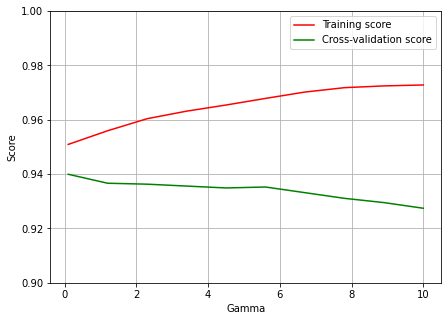

In [30]:
X_t, y = sample(N1 = 120, N2 = 120, r = 10)

train_score = []
test_score = []

X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.2,random_state=1)
cv = ShuffleSplit(n_splits=120, test_size=0.2, random_state=1)

#hacemos variar el hiperparametro gamma con 10 valores distintos 
variaciongamma = np.linspace(0.1, 10, 10) #solo voy a tomar 10 valores por el tiempo que toma el computo
for gammaN in variaciongamma:
    clf = SVC(gamma = gammaN)    
    train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=X_t, y = y,cv=cv, n_jobs=1)
    #uso learning_curve para obtener los scores empleando cross-validation
    #ahora tomo los promedios de los valores que hay dentro de las listas de scores
    PROMtrain_scores = np.mean(train_scores, axis=1)[-1]
    PROMtest_scores = np.mean(test_scores, axis=1)[-1]
    train_score.append(PROMtrain_scores)
    test_score.append(PROMtest_scores)

#graficamo
plt.figure(figsize=(7,5))
plt.plot(variaciongamma, train_score, 'r-', label="Training score")
plt.plot(variaciongamma, test_score, 'g-', label="Cross-validation score")
plt.legend(loc=0)
plt.xlabel(r"Gamma")
plt.ylabel("Score")
plt.ylim(0.9, 1)
plt.grid()


In [31]:
#encontramos el maximo score a cual gamma corresponde
max_value = max(test_score)
max_index = test_score.index(max_value)
print("Gamma = %0.2f"%variaciongamma[max_index])
print("CrosValidation score = %0.2f"%max_value)

Gamma = 0.10
CrosValidation score = 0.94
